# Assignment 2: Data Summary
* WONJUN PARK, Computer Science and Engineering, 201811182, Konkuk University

## db_score.xlsx 데이터에 대하여 다음의 결과를 출력하되, python으로 구현하라.
    1. mean, median (midterm, final, score 각각)
    2. mode (grade)
    3. variance, standard deviation (midterm, final, score 각각)
    4. percentile plot (midterm, final, score 각각)
    5. boxplot (midterm, final, score 각각)
    6. histogram (midterm, final, score 각각)
    7. scatter plot (midterm, final, score 에 대한, 모든 가능한 attribute 조합에 대하여 그릴 것)

* 보고서 포함내용: 내용설명, 소스코드(.py 등)와 출력결과 캡쳐 화면

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from excel
excel_file = 'db_score.xlsx'
table = pd.read_excel(excel_file)

In [2]:
### 1번. Attribute midterm, final, score에 대해 mean, median을 출력하라.

midterm = table['midterm'].to_numpy()
final = table['final'].to_numpy()
score = table['score'].to_numpy()

mean = pd.DataFrame([['mean', midterm.mean(), final.mean(), score.mean()]],
                    columns=['Attribute', 'midterm', 'final', 'score'])
median = pd.DataFrame([['median', np.median(midterm), np.median(final), np.median(score)]],
                     columns=['Attribute', 'midterm', 'final', 'score'])

result = pd.concat([mean, median], ignore_index=True)
print(result)

  Attribute    midterm     final     score
0      mean  23.560978  14.14837  64.04413
1    median  24.500000  13.65000  67.58500


In [3]:
### 2번. Attribute grade에 대해 mode를 출력하라.
from statistics import multimode

grade = table['grade'].to_numpy()

mode = multimode(grade)
print(mode)

['A', 'B', 'C', 'D']


In [4]:
### 3번. Attribute midterm, final, score에 대해 variance, standard deviation을 출력하라.
variance = pd.DataFrame([['variance', np.var(midterm), np.var(final), np.var(score)]],
                       columns=['Attribute', 'midterm', 'final', 'score'])
standard_deviation = pd.DataFrame([['standard deviation', np.nanstd(midterm), np.nanstd(final), np.nanstd(score)]],
                                 columns=['Attribute', 'midterm', 'final', 'score'])

result = pd.concat([variance, standard_deviation], ignore_index=True)
print(result)

            Attribute    midterm      final       score
0            variance  62.313398  59.911111  228.779255
1  standard deviation   7.893884   7.740227   15.125451


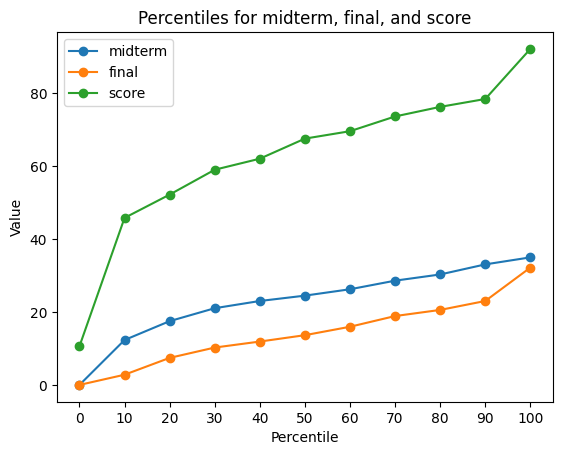

In [5]:
### 4번. Attribute [midterm, final, score]에 대해 percentile plot을 출력하라
midterm_percentile = np.array([])
final_percentile = np.array([])
score_percentile = np.array([])
percentile = range(0, 101, 10)

for tick in percentile:
    midterm_percentile = np.append(midterm_percentile, np.percentile(midterm, tick))
    final_percentile = np.append(final_percentile, np.percentile(final, tick))
    score_percentile = np.append(score_percentile, np.percentile(score, tick))

ax = plt.gca()
ax.plot(percentile, midterm_percentile, label='midterm', marker='o')
ax.plot(percentile, final_percentile, label='final', marker='o')
ax.plot(percentile, score_percentile, label='score', marker='o')

ax.set(
    title='Percentiles for midterm, final, and score',
    xlabel='Percentile',
    ylabel='Value',
    xticks=percentile
)
ax.legend()
plt.show()

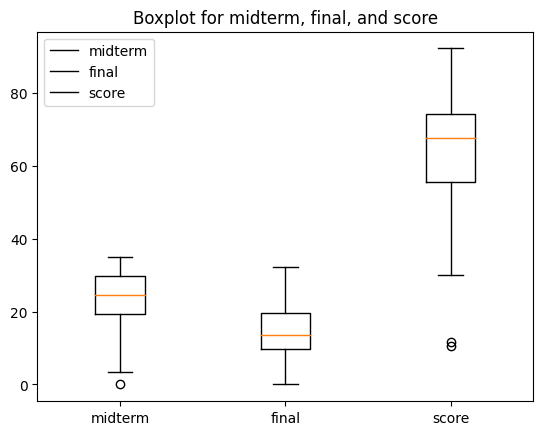

In [6]:
# 5번. Attribute midterm, final, score에 대해 boxplot을 출력하라
ax = plt.gca()
data = [midterm, final, score]

ax.boxplot(data, labels=['midterm', 'final', 'score'])
ax.set(
    title='Boxplot for midterm, final, and score',
)
ax.legend(['midterm', 'final', 'score'])
plt.show()

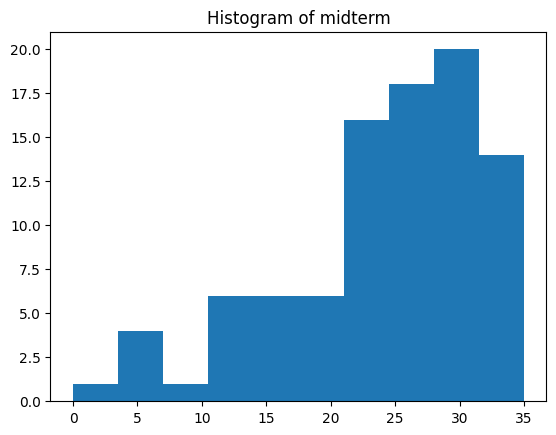

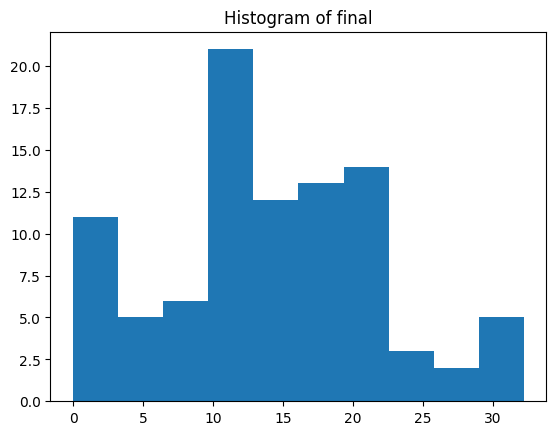

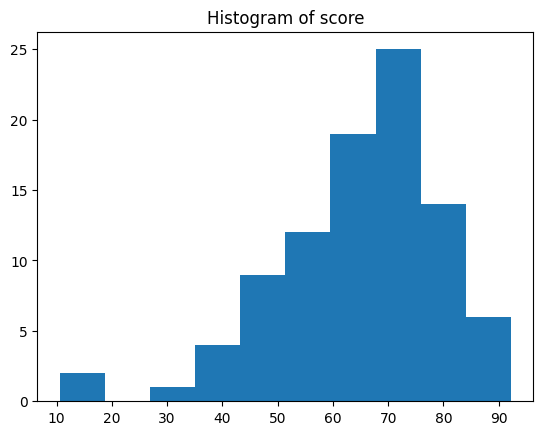

In [10]:
# 6번. Attribute midterm, final, socre에 대해 histogram을 출력하라
fig, ax = plt.subplots()
ax.hist(midterm)
ax.set(
    title='Histogram of midterm'
)

fig, ax = plt.subplots()
ax.hist(final)
ax.set(
    title='Histogram of final'
)

fig, ax = plt.subplots()
ax.hist(score)
ax.set(
    title='Histogram of score'
)

plt.show()

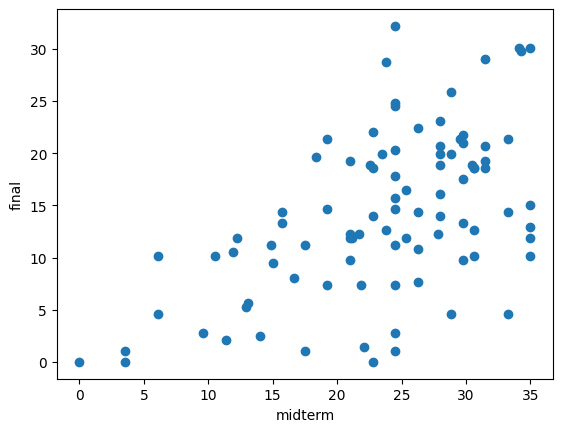

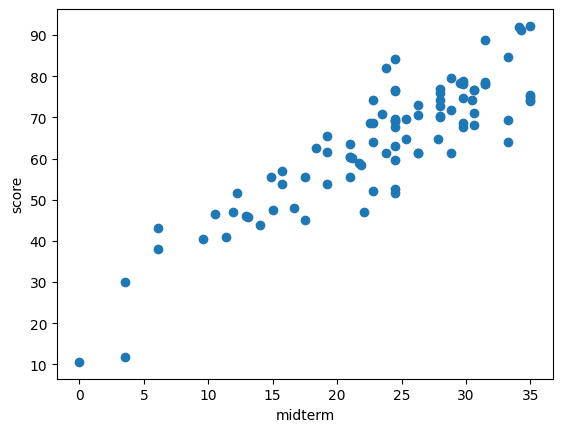

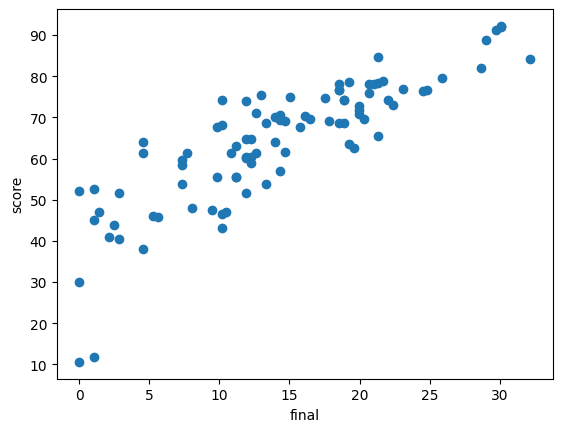

In [8]:
# 7번. Attribute midterm, final, score에 대한 모든 가능한 attribute 조합을 scatter plot으로 그려라.
fig, ax = plt.subplots()
ax.scatter(midterm, final)
ax.set(
    xlabel='midterm', ylabel='final'
)

fig, ax = plt.subplots()
ax.scatter(midterm, score)
ax.set(
    xlabel='midterm', ylabel='score'
)

fig, ax = plt.subplots()
ax.scatter(final, score)
ax.set(
    xlabel='final', ylabel='score'
)

plt.show()